# Guest Stars in The Office

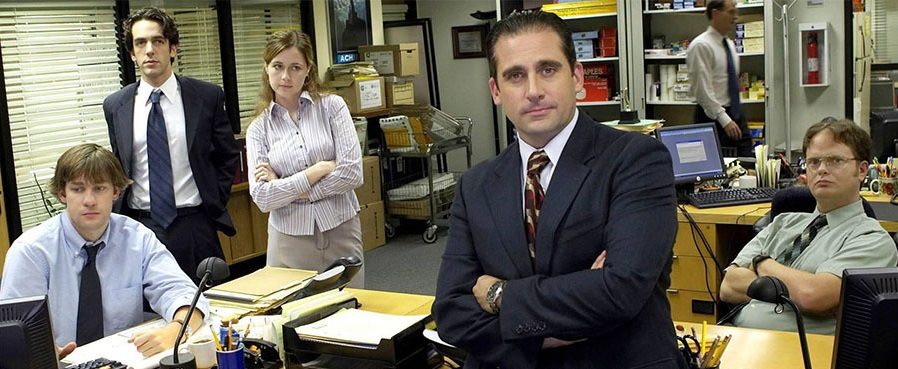


<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [11, 7]

In [2]:
df = pd.read_csv("datasets/office_episodes.csv", parse_dates=['release_date'])
df.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


Data visualization is often a great way to start exploring your data and uncovering insights. In this notebook, you will initiate this process by creating an informative plot of the episode data provided to you. In doing so, you're going to work on several different variables, including the episode number, the viewership, the fan rating, and guest appearances. Here are the requirements needed to pass this project:

## 1. Create a matplotlib scatter plot of the data that contains the following attributes:

<ul>
    <li>Each episode's episode number plotted along the x-axis</li>
    <li>Each episode's viewership (in millions) plotted along the y-axis</li>
    <li>A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:</li>
        <ul>
            <li>Ratings < 0.25 are colored "red"</li>
            <li>Ratings >= 0.25 and < 0.50 are colored "orange"</li>
            <li>Ratings >= 0.50 and < 0.75 are colored "lightgreen"</li>
            <li>Ratings >= 0.75 are colored "darkgreen"</li>
        </ul>
    <li>A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25</li>
    <li>A title, reading "Popularity, Quality, and Guest Appearances on the Office"</li>
    <li>An x-axis label reading "Episode Number"</li>
    <li>A y-axis label reading "Viewership (Millions)"</li>
</ul>

In [3]:
# Defines an empty list for colors 
colors = []


# Iterate over of rows dataset
for lab, rows in df.iterrows():
    if rows["scaled_ratings"] < 0.25:
        colors.append("red")
    elif rows["scaled_ratings"] < 0.50:
        colors.append("orange")
    elif rows["scaled_ratings"] < 0.75:
        colors.append("lightgreen")
    else:
        colors.append("darkgreen")

print(colors[:10])

['orange', 'lightgreen', 'orange', 'orange', 'lightgreen', 'orange', 'lightgreen', 'orange', 'lightgreen', 'lightgreen']


In [5]:
# Define size a
size = []

for lab, rows in df.iterrows():
    if rows["has_guests"]:
        size.append(250)
    else:
        size.append(25)
        
print(size[:10])


[25, 25, 25, 25, 25, 250, 25, 25, 250, 250]


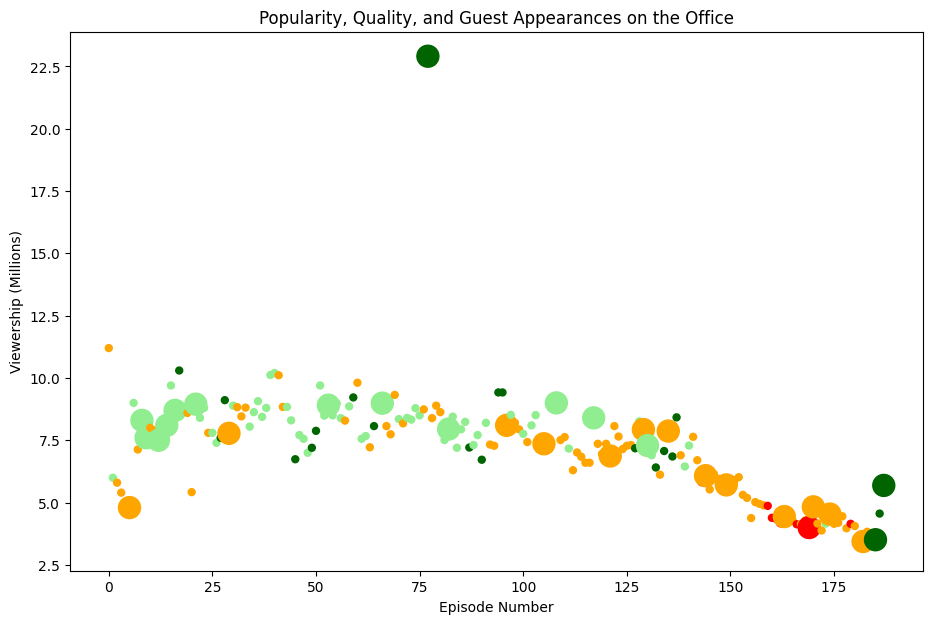

In [6]:
fig = plt.figure()

plt.scatter(df["episode_number"], 
            df["viewership_mil"],
           c=colors,
           s=size)

plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

plt.show()

## 2.Provide the name of one of the guest stars who was in the most watched Office episode. 
Save it as a string in the variable top_star (e.g. top_star = "Will Ferrell").

In [17]:
df["colors"] = colors
df["sizes"] = size

top_star = df[df["viewership_mil"] == df["viewership_mil"].max()]['guest_stars']
top_star

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

In [9]:
top_star = "Jessica Alba"

## Bonus Step!
Although it was not taught in Intermediate Python, a useful skill for visualizing different data points is to use a different marker. You can learn more about them via the Matplotlib documentation or via our course Introduction to Data Visualization with Matplotlib. Thus, as a bonus step, try to differentiate guest appearances not just with size, but also with a star!

All other attributes still apply (data on the axes, color scheme, sizes for guest appearances, title, and axis labels).

In [13]:
has_no_guest = df[df["has_guests"] == False]
has_no_guest.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings,colors,sizes
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125,orange,25
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125,lightgreen,25
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500,orange,25
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875,orange,25
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250,lightgreen,25


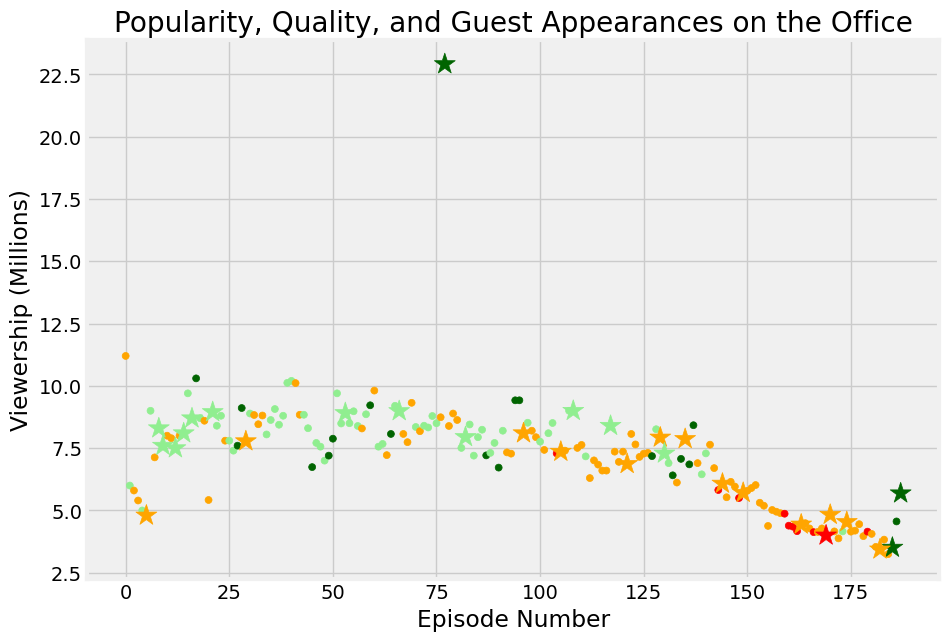

In [15]:
fig = plt.figure()

plt.style.use("fivethirtyeight")

plt.scatter(has_no_guest["episode_number"], 
            has_no_guest["viewership_mil"],
           c=has_no_guest["colors"],
           s=has_no_guest["sizes"],
           marker="o")

plt.scatter(has_guest["episode_number"], 
            has_guest["viewership_mil"],
           c=has_guest["colors"],
           s=has_guest["sizes"],
           marker="*")

plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

plt.show()